# DDIM (Denoising Diffusion Implicit Models) の実装

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/py-img-gen/python-image-generation/blob/main/notebooks/3-2-2_ddim.ipynb)

参考: https://github.com/JeongJiHeon/ScoreDiffusionModel/blob/main/DDIM/DDIM_MNIST.ipynb

## 準備


In [1]:
!pip install -qq py-img-gen

In [2]:
import pathlib

current_dir = pathlib.Path.cwd()
project_dir = current_dir / "data" / "ddim"
project_dir.mkdir(exist_ok=True, parents=True)
print(f"Created a directory: {project_dir}")

import torch

device = torch.device(
    "cuda" if torch.cuda.is_available() else "cpu"
)

Created a directory: /root/ghq/github.com/py-img-gen/python-image-generation/notebooks/data/ddim


## 設定の定義

In [3]:
from py_img_gen.trainers import TrainDDPMConfig

train_config = TrainDDPMConfig(
    num_epochs=20, output_dir=project_dir
)
print(train_config)

TrainDDPMConfig(output_dir=PosixPath('/root/ghq/github.com/py-img-gen/python-image-generation/notebooks/data/ddim'), seed=42, batch_size=256, num_epochs=20, num_timesteps=500, lr=0.0001, num_workers=4, beta_1=0.0001, beta_T=0.02, eta_ddim=0.0)


In [4]:
from py_img_gen.trainers import EvalConfig

eval_config = EvalConfig()
print(eval_config)

EvalConfig(eval_epoch=1, num_generate_images=16, num_grid_rows=4, num_grid_cols=4)


In [5]:
from py_img_gen.trainers import DDPMModelConfig

model_config = DDPMModelConfig()
print(model_config)

DDPMModelConfig(sample_size=32, in_channels=1, out_channels=1, block_out_channels=(64, 128, 256, 512), layers_per_block=3, down_block_types=('DownBlock2D', 'DownBlock2D', 'DownBlock2D', 'DownBlock2D'), up_block_types=('UpBlock2D', 'UpBlock2D', 'UpBlock2D', 'UpBlock2D'))


## シードの固定

In [6]:
from transformers import set_seed

set_seed(seed=train_config.seed)

## Denoiser の定義

In [7]:
from dataclasses import asdict

from diffusers import UNet2DModel

unet = UNet2DModel(
    **asdict(model_config),
)
unet = unet.to(device)

## Noise Scheduler の定義

In [8]:
from diffusers import DDIMScheduler

noise_scheduler = DDIMScheduler(
    num_train_timesteps=train_config.num_timesteps,
    beta_start=train_config.beta_1,
    beta_end=train_config.beta_T,
)

## Optimizer の定義

In [9]:
optim = torch.optim.Adam(
    unet.parameters(), lr=train_config.lr
)

## データセットの読み込み

In [10]:
from py_img_gen.trainers import (
    get_simple_resize_transforms,
)

transform = get_simple_resize_transforms(
    sample_size=model_config.sample_size
)
print(transform)

Compose(
    Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [11]:
import torchvision
from torch.utils.data import DataLoader

dataset = torchvision.datasets.MNIST(
    root=project_dir,
    train=True,
    download=True,
    transform=transform,
)

data_loader = DataLoader(
    dataset=dataset,
    batch_size=train_config.batch_size,
    shuffle=True,
    drop_last=True,
    num_workers=train_config.num_workers,
)

## DDIM の訓練

In [12]:
from py_img_gen import trainers

trainers.train(
    train_config=train_config,
    eval_config=eval_config,
    unet=unet,
    noise_scheduler=noise_scheduler,
    optim=optim,
    data_loader=data_loader,
    device=device,
)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

Iteration:   0%|          | 0/234 [00:00<?, ?it/s]

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

## DDIM の推論

### 推論過程のアニメーションの表示

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

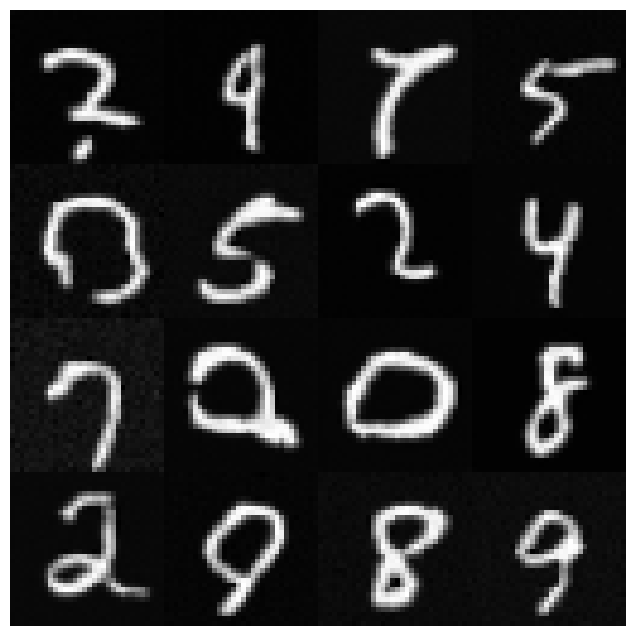

In [13]:
from IPython.display import HTML
from py_img_gen import inferencers

ani = inferencers.animation_inference(
    train_config=train_config,
    eval_config=eval_config,
    unet=unet,
    noise_scheduler=noise_scheduler,
)

HTML(ani.to_jshtml())

### $\eta$ の値を変えたときの生成結果の変化

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

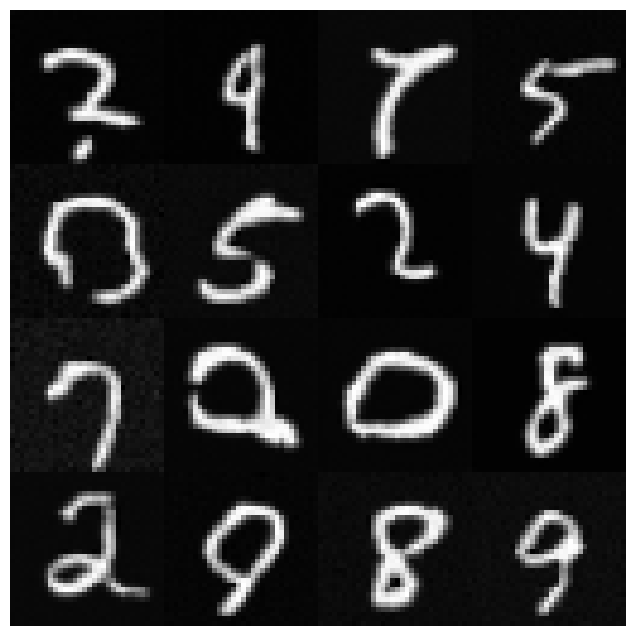

In [14]:
import dataclasses

ani = inferencers.animation_inference(
    train_config=dataclasses.replace(
        train_config,
        eta_ddim=0.0,  # pure DDIM
    ),
    eval_config=eval_config,
    unet=unet,
    noise_scheduler=noise_scheduler,
)

HTML(ani.to_jshtml())

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

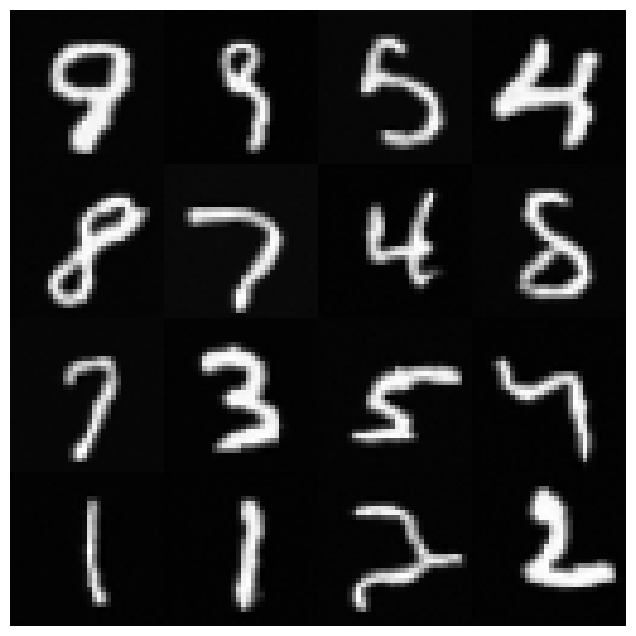

In [15]:
ani = inferencers.animation_inference(
    train_config=dataclasses.replace(
        train_config,
        eta_ddim=1.0,  # pure DDPM
    ),
    eval_config=eval_config,
    unet=unet,
    noise_scheduler=noise_scheduler,
)
HTML(ani.to_jshtml())

Generating...:   0%|          | 0/500 [00:00<?, ?it/s]

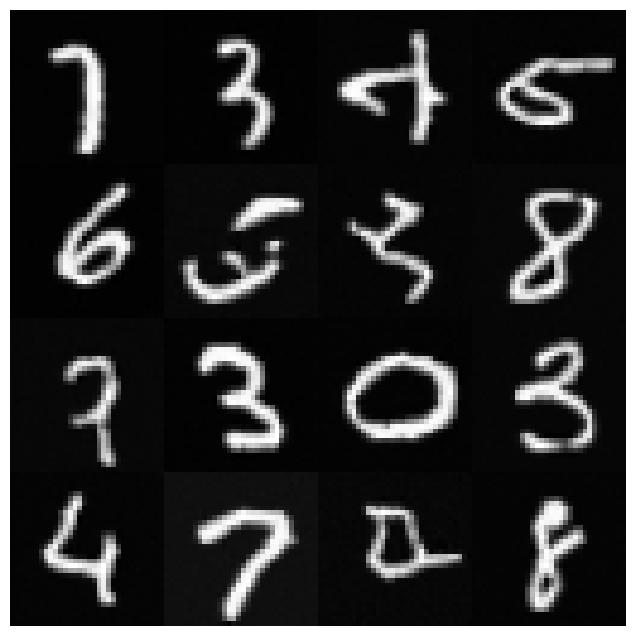

In [16]:
ani = inferencers.animation_inference(
    train_config=dataclasses.replace(
        train_config,
        eta_ddim=0.5,  # interpolation of DDIM and DDPM
    ),
    eval_config=eval_config,
    unet=unet,
    noise_scheduler=noise_scheduler,
)

HTML(ani.to_jshtml())

### diffusers のパイプラインによる推論

In [17]:
from diffusers import DDIMPipeline

pipe = DDIMPipeline(unet=unet, scheduler=noise_scheduler)
pipe = pipe.to(device)

  0%|          | 0/500 [00:00<?, ?it/s]

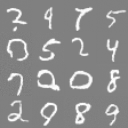

In [18]:
from diffusers.utils import make_image_grid

output = pipe(
    num_inference_steps=train_config.num_timesteps,
    batch_size=eval_config.num_generate_images,
    generator=torch.manual_seed(train_config.seed),
    eta=0.0,  # pure DDIM
)
image = make_image_grid(
    images=output.images,
    rows=eval_config.num_grid_rows,
    cols=eval_config.num_grid_cols,
)
image